# Libraries

In [ ]:
!pip install fbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.optimize import fsolve
import numpy as np
from fbm import fgn

import matplotlib.pyplot as plt

# Variables

In [ ]:
''' Variables Declaration '''
# Solar parameters
M_sun = 1.989 * 10**30                          # Sun's mass in kg
M_earth = 5.972 * 10**24
M_jup = 1.899 * 10**27

# Input Parameters
P_orb = 50                                      # Orbital period in days
ai = 90                                         # Inclination angle of star (ranged over 0 and 90 degrees)
omega = (np.pi/180)*(340)                       # Aargument of pericenter in true orbital plane (rad)
excent = 0.3                                   # Eccentricity
tp = 10

np_ = 0.5                                         # Planet mass fraction (in Jupter mass unit)
M_p = np_ * M_jup                               # Planet mass

ns = 1                                          # Stellar mass fraction (in Sun mass unit)
M_star = ns * M_sun                             # Stellar mass

# Execution

In [ ]:
# Eq Torres
K = 203.29 * ((M_p * np.sin(np.pi/180*ai))/M_jup) * ((M_sun/(M_star + M_p))**(2/3)) * ((P_orb)**(-1/3)) * (1/np.sqrt(1-excent**2))

In [ ]:
cadence = 8
times = np.linspace(1, 100, 100)
range_ = P_orb/len(times)
times *= range_

def transcendental(Et, excent, eqLeft):
  return Et - excent*np.cos(Et) - eqLeft

EtS = []

for time in times:
  eqLeft = (2*np.pi/P_orb) * (time-tp)                                  # Mass function
  res = fsolve(lambda x: transcendental(x, excent, eqLeft), x0=-10)
  if time == 20:
    print(res[0])
  #print(res[0], '\n')
  EtS.append(res[0])

ni_t = np.arccos((np.cos(EtS) - excent) / (1 - excent*np.cos(EtS)))

#times = times + 1
#times = P_orb/times

RV = K * (np.cos(omega + ni_t) + excent*np.cos(omega))

1.3285904661992227


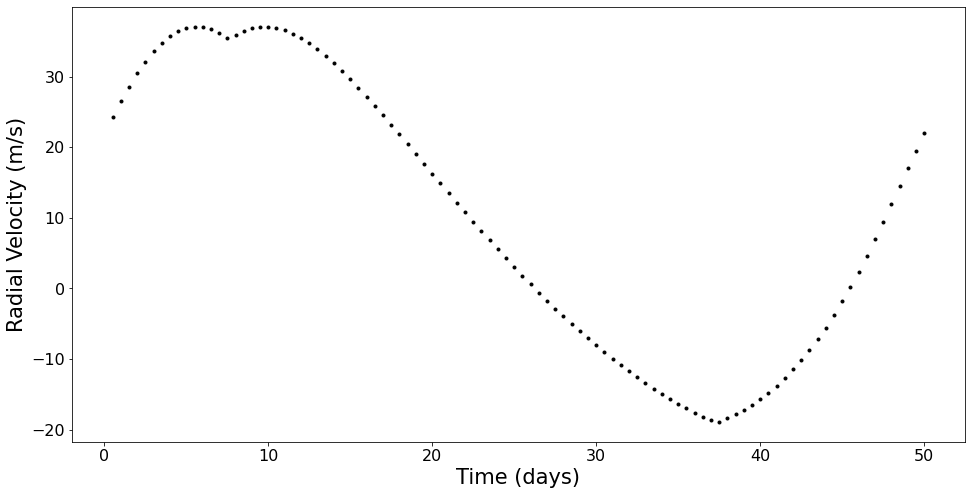

In [ ]:
tam = 16

def plotar(times, y):
  plt.rcParams["figure.figsize"] = (16,8)
  plt.plot(times, y, '.k')
  plt.xlabel('Time (days)', fontsize = tam+5)
  plt.xticks(fontsize = tam)
  plt.ylabel('Radial Velocity (m/s)', fontsize = tam+5)
  plt.yticks(fontsize = tam)
  plt.show()

plotar(times, RV)

# Noise

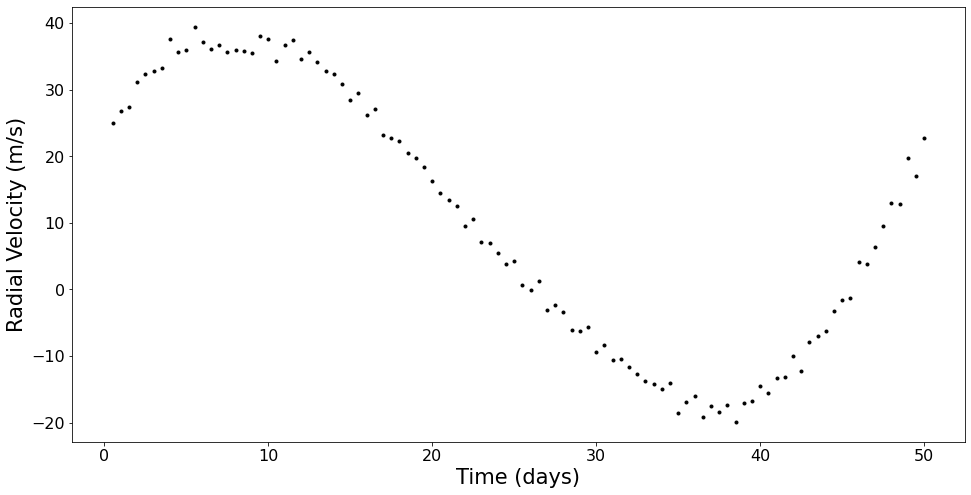

In [ ]:
''' Noisy time series '''

stdnoise = 5
fs = len(times)
noise = fgn(n=fs, hurst=0.0003)

RV_noise = RV + noise

plotar(times, RV_noise)

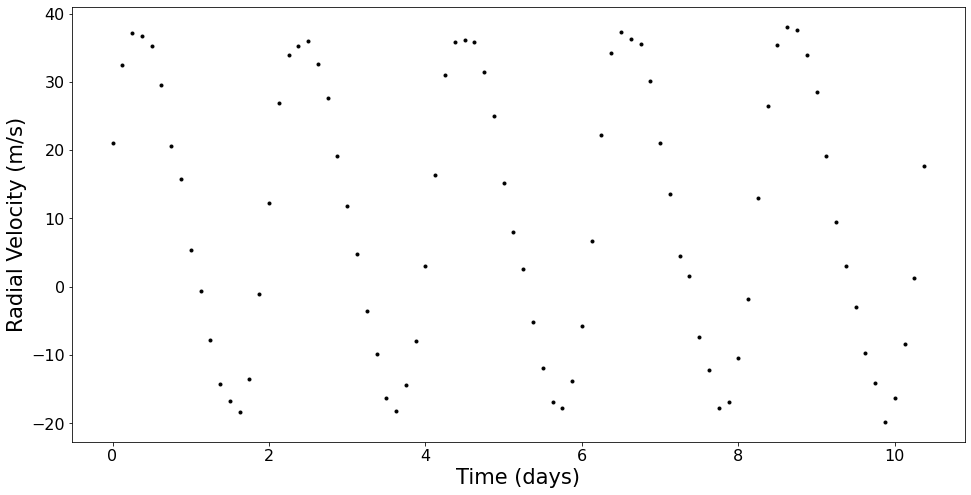

In [ ]:
# Remove periodically points (2 in each 3 points)

RV_noise_red = RV_noise[0::3]
times_red = times[0::3]/24

plotar(times_red, RV_noise_red)

In [ ]:
x = np.linspace(1,10,10)
print(x)
print(x[0::3])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1.  4.  7. 10.]
